In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

In [2]:
#importing dataset
df=pd.read_csv("C:\\Users\\Umesh Gupta\\dataset\\flight_fare3.csv")
df

,Unnamed: 0,Flight name,Departure_time,Arrival_time,Price,Source,Destination,Duration,No of stop,Date
0,0,Go First,05:45,12:10,5985,Bengaluru,Delhi,6h 25m,1,2021-11-28
1,1,Go First,15:35,23:00,5985,Bengaluru,Delhi,7h 25m,1,2021-11-28
2,2,Go First,11:00,19:55,5985,Bengaluru,Delhi,8h 55m,1,2021-11-28
3,3,Go First,22:00,08:10,5985,Bengaluru,Delhi,10h 10m,1,2021-11-28
4,4,Go First,15:45,02:10,5985,Bengaluru,Delhi,10h 25m,1,2021-11-28
...,...,...,...,...,...,...,...,...,...,...
10233,10233,Air India,07:45,11:55,10059,Kolkata,Hyderabad,28h 10m,3,2022-01-07
10234,10234,Vistara,10:15,20:55,10204,Kolkata,Hyderabad,10h 40m,2,2022-01-07
10235,10235,Vistara,10:15,20:55,10204,Kolkata,Hyderabad,10h 40m,2,2022-01-07
10236,10236,Vistara,10:25,19:55,10334,Kolkata,Hyderabad,9h 30m,2,2022-01-07


In [3]:
#checking shape of dataset
print("The no. of Rows in dataset is: ",df.shape[0],"and no. of columns is ",df.shape[1])

The no. of Rows in dataset is:  10238 and no. of columns is  10


In [4]:
#checking datatype of object
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10238 entries, 0 to 10237
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      10238 non-null  int64 
 1   Flight name     10238 non-null  object
 2   Departure_time  10238 non-null  object
 3   Arrival_time    10238 non-null  object
 4   Price           10238 non-null  int64 
 5   Source          10238 non-null  object
 6   Destination     10238 non-null  object
 7   Duration        10238 non-null  object
 8   No of stop      10238 non-null  object
 9   Date            10238 non-null  object
dtypes: int64(2), object(8)
memory usage: 800.0+ KB


In [5]:
#checking nan value
df.isna().sum()

Unnamed: 0        0
Flight name       0
Departure_time    0
Arrival_time      0
Price             0
Source            0
Destination       0
Duration          0
No of stop        0
Date              0
dtype: int64

In [6]:
#checking basic info 
df.describe()

,Unnamed: 0,Price
count,10238.000000,10238.000000
mean,5118.500000,8779.683044
std,2955.600362,4711.374770
min,0.000000,1604.000000
25%,2559.250000,5654.750000
50%,5118.500000,7569.000000
75%,7677.750000,10957.000000
max,10237.000000,53992.000000


In [7]:
#checking unique in dataset
df.nunique().sort_values()

Source                2
Destination           4
Flight name           6
No of stop            6
Date                 10
Departure_time      178
Arrival_time        221
Duration            381
Price              2649
Unnamed: 0        10238
dtype: int64

<AxesSubplot:>

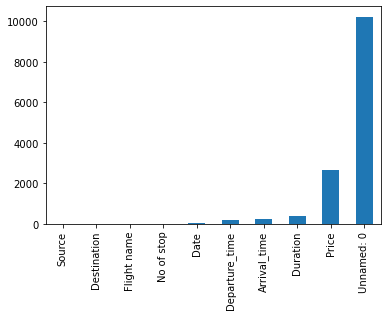

In [8]:
#checking unique in dataset
df.nunique().sort_values().plot.bar()

#  analysis

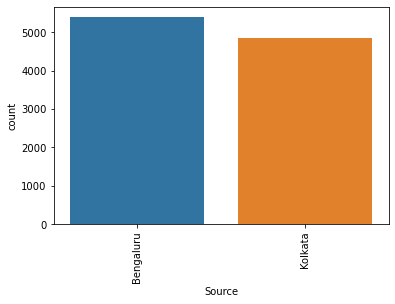

In [9]:
sns.countplot(df["Source"],data=df)
plt.xticks(rotation=90)
plt.show()

for both the location the flight ratio is same

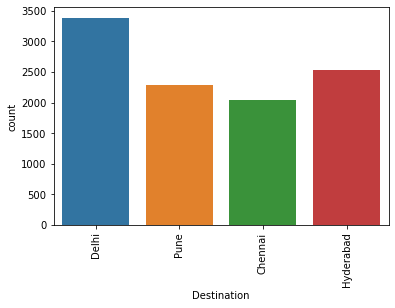

In [10]:
sns.countplot(df["Destination"],data=df)
plt.xticks(rotation=90)
plt.show()

we see that for delhi destination we have more flight as compare to other places

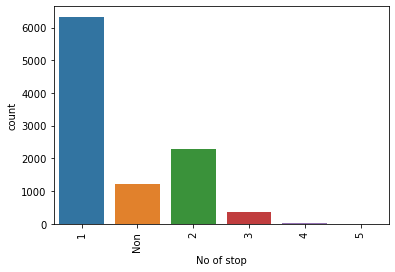

In [11]:
sns.countplot(df["No of stop"],data=df)
plt.xticks(rotation=90)
plt.show()

most of the flights are one stop flight and generally people prefer hault in journey

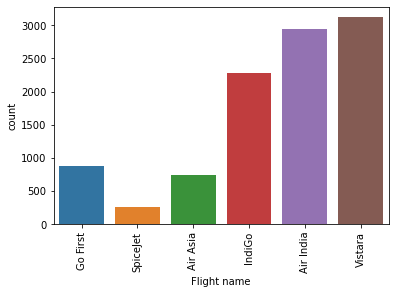

In [12]:
sns.countplot(df["Flight name"],data=df)
plt.xticks(rotation=90)
plt.show()

as we can see vistara has currently most no of flights running

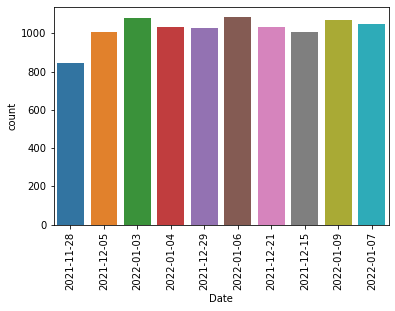

In [13]:
sns.countplot(df["Date"],data=df)
plt.xticks(rotation=90)
plt.show()

for all the dates the flight are equal

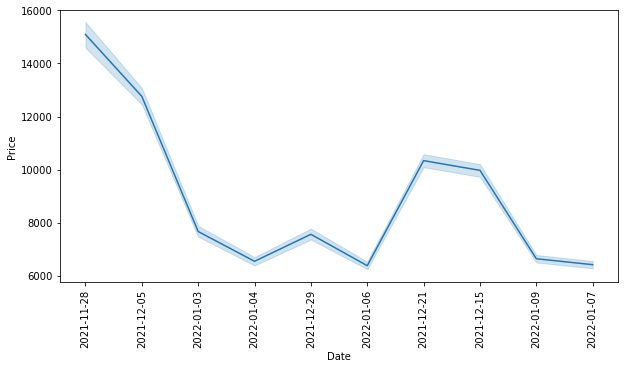

In [14]:
plt.figure(figsize=(10,5))
sns.lineplot(df["Date"],df["Price"])
plt.xticks(rotation=90)
plt.show()

we can see that last minute flight are expensive or the flight whuch is near some festive occasion are expensive

<AxesSubplot:xlabel='Price', ylabel='Density'>

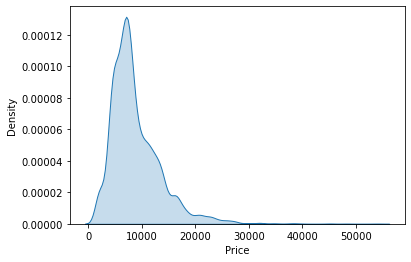

In [15]:
sns.kdeplot(df["Price"],data=df,fill=True)

price is slightly right skewed

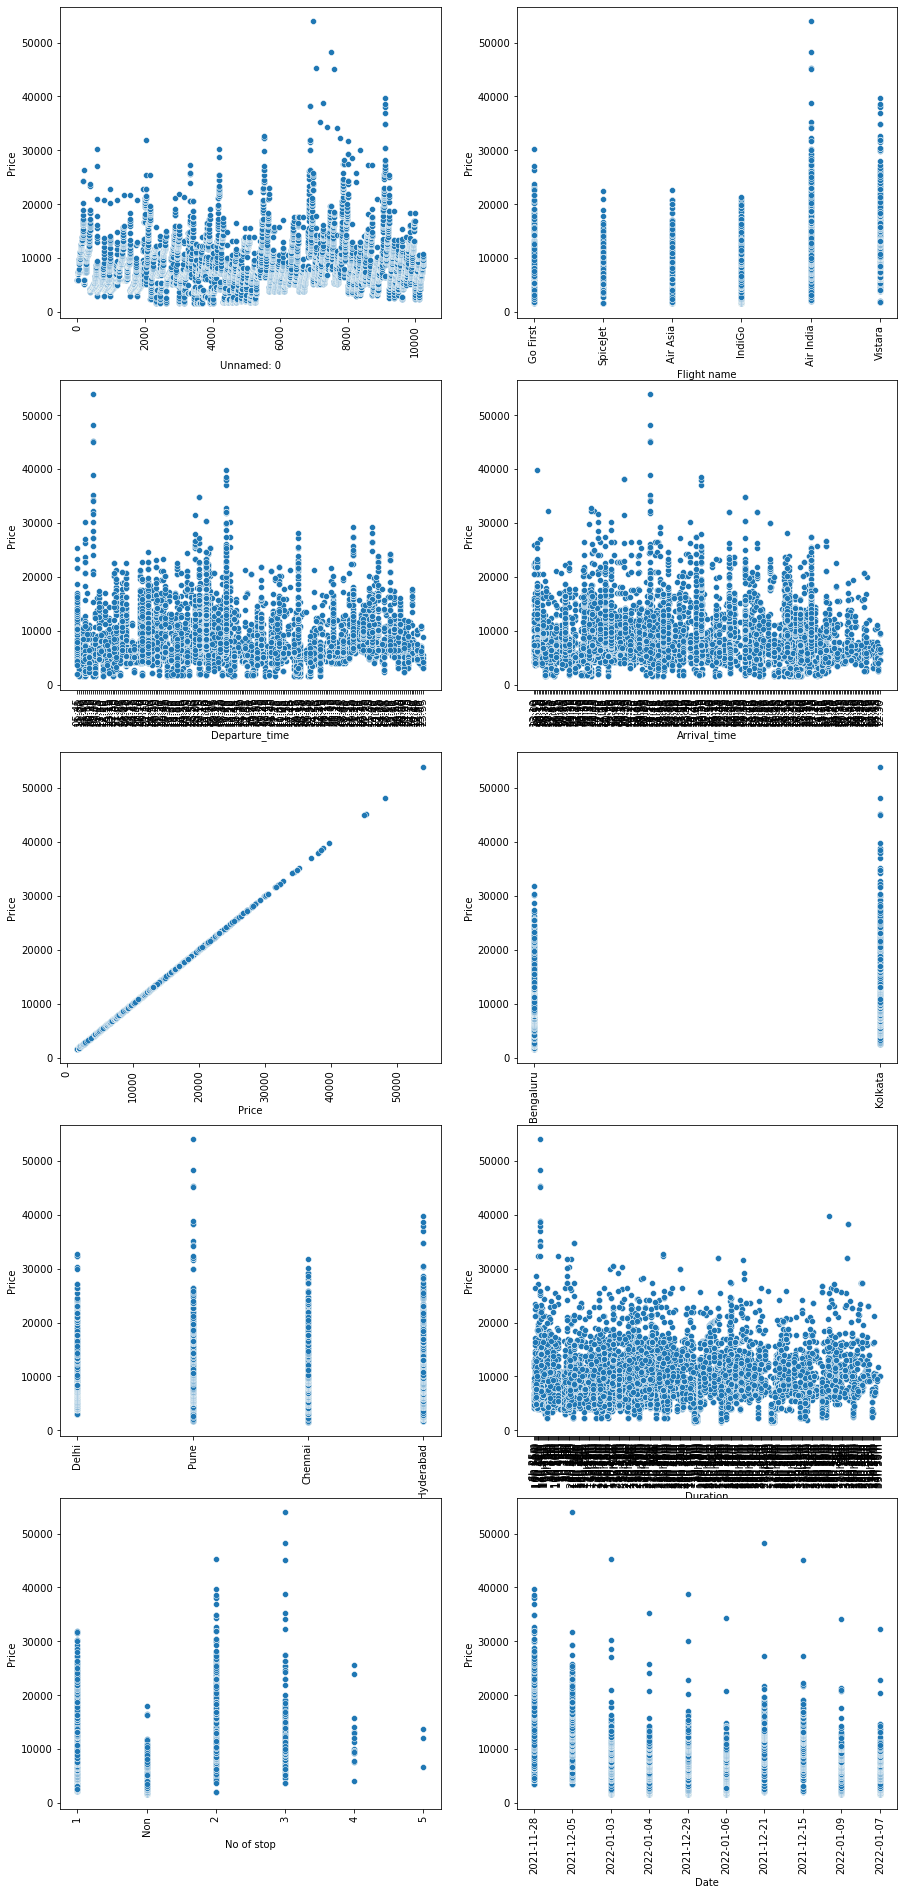

In [16]:
#bivariate analysis
plotnumber=1
plt.figure(figsize=(15,40))
for i in df:
    if plotnumber < 12:
        ax = plt.subplot(6,2,plotnumber)
        sns.scatterplot(df[i],df["Price"])
        plt.xticks(rotation=90)
    plotnumber+=1
plt.show()

air india have maximun travel price as compare to other flights

3 stop flight hsvr high fare as compare to other stops

flight to pune have maximum fare may be it is travelling by diferent route and haulting a bit in between

early morning flight are expensive as compare to afternoon flight



In [17]:
# feature engineering

In [18]:
#splitting date into date and month 
df["Date"]= pd.to_datetime(df["Date"])
df["Day"]=df["Date"].dt.day
df["Month"]=df["Date"].dt.month

In [19]:
#splitting daparture time and arrival time
df["Departure_time"] = pd.to_datetime(df["Departure_time"])

df["dep_hour"] = df["Departure_time"].dt.hour

df["dep_min"] = df["Departure_time"].dt.minute

In [20]:
df["Arrival_time"] = pd.to_datetime(df["Arrival_time"])
df['Arr_hour'] = df["Arrival_time"].dt.hour
df['Arr_min'] = df["Arrival_time"].dt.minute

In [21]:
#dropping unwanted columns
df.drop(["Date","Departure_time","Arrival_time","Unnamed: 0"],axis=1,inplace=True)

In [22]:
# splitting duration into and hour and min in seperate column for better understanding
s=pd.to_timedelta(df['Duration'])
df['hours']=s.dt.components['hours']
df['minutes']=s.dt.components['minutes']

In [23]:
df.drop(["Duration"],inplace=True,axis=1)

In [24]:
# replacing non with 0 to make it a discrete column as model will not understan non
df["No of stop"] = df["No of stop"].replace("Non",0)

In [25]:
#chaning datatype of int
df["No of stop"]= df["No of stop"].astype("int64")

In [26]:
#replacing source manually with 1 and 2
df["Source"] = df["Source"].replace("Bengaluru",1)
df["Source"] = df["Source"].replace("Kolkata",2)

In [27]:
#verifying datatype is correct 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10238 entries, 0 to 10237
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Flight name  10238 non-null  object
 1   Price        10238 non-null  int64 
 2   Source       10238 non-null  int64 
 3   Destination  10238 non-null  object
 4   No of stop   10238 non-null  int64 
 5   Day          10238 non-null  int64 
 6   Month        10238 non-null  int64 
 7   dep_hour     10238 non-null  int64 
 8   dep_min      10238 non-null  int64 
 9   Arr_hour     10238 non-null  int64 
 10  Arr_min      10238 non-null  int64 
 11  hours        10238 non-null  int64 
 12  minutes      10238 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.0+ MB


In [28]:
#label encoding 
features=["Flight name","Destination"]

In [29]:
# for converting categorical to numericalcolumn as machine learing understands numerical value not text
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
for i in df[features]:
    df[i]=label.fit_transform(df[i])
    
df
    

,Flight name,Price,Source,Destination,No of stop,Day,Month,dep_hour,dep_min,Arr_hour,Arr_min,hours,minutes
0,2,5985,1,1,1,28,11,5,45,12,10,6,25
1,2,5985,1,1,1,28,11,15,35,23,0,7,25
2,2,5985,1,1,1,28,11,11,0,19,55,8,55
3,2,5985,1,1,1,28,11,22,0,8,10,10,10
4,2,5985,1,1,1,28,11,15,45,2,10,10,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10233,1,10059,2,2,3,7,1,7,45,11,55,4,10
10234,5,10204,2,2,2,7,1,10,15,20,55,10,40
10235,5,10204,2,2,2,7,1,10,15,20,55,10,40
10236,5,10334,2,2,2,7,1,10,25,19,55,9,30


<function matplotlib.pyplot.show(close=None, block=None)>

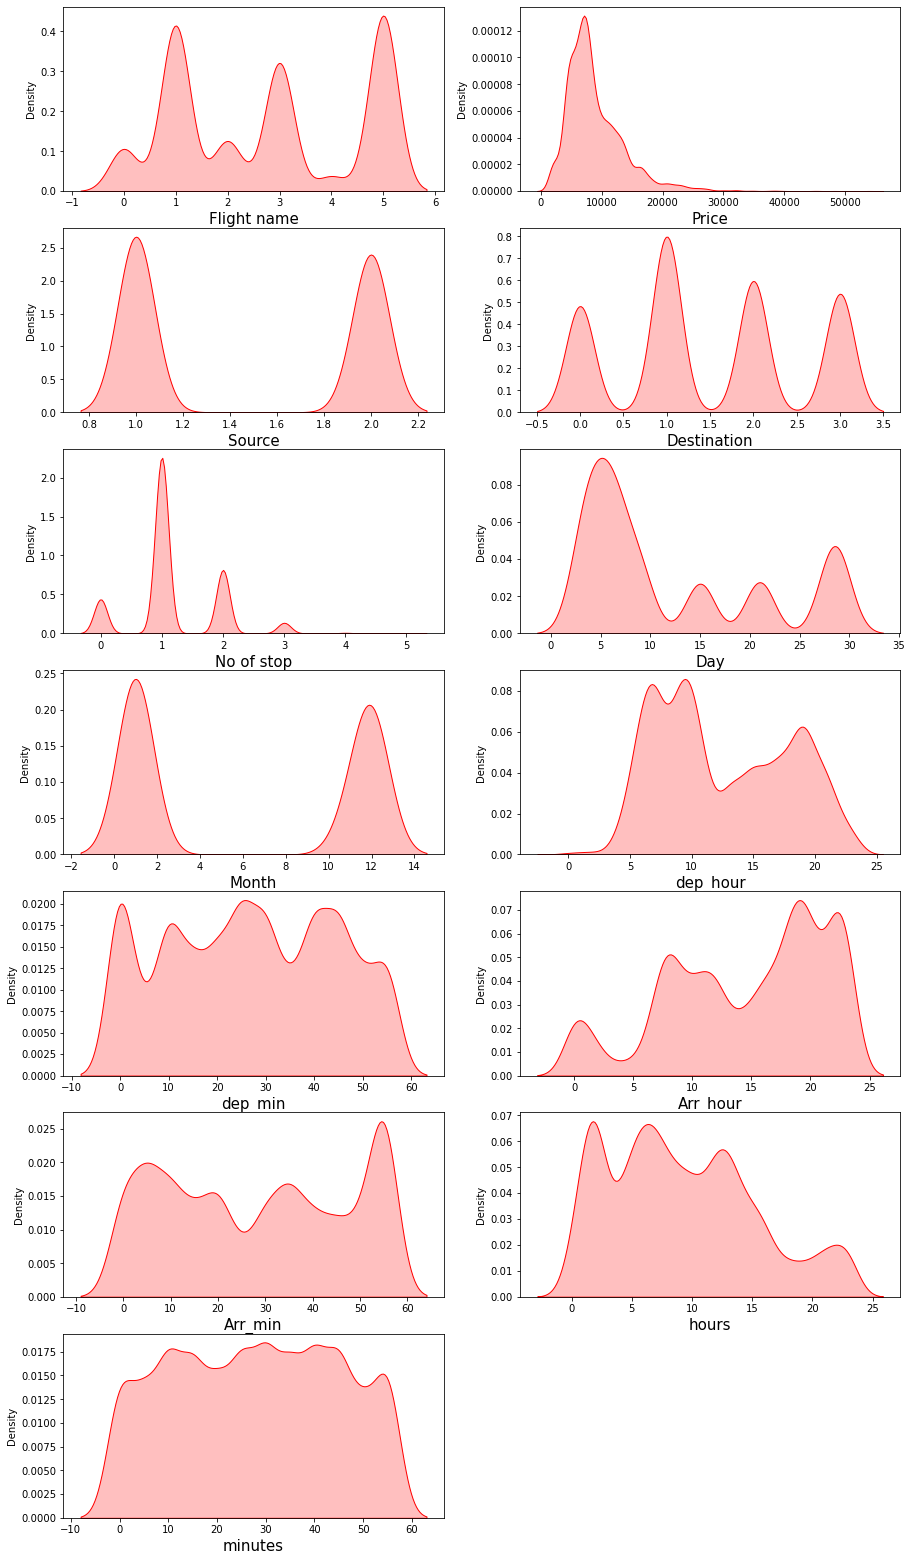

In [30]:
#univariate analysis
plotnumber=1
plt.figure(figsize=(15,40))
for i in df:
    if plotnumber < 20:
        ax=plt.subplot(10,2,plotnumber)
        sns.kdeplot(df[i],data=df,fill=True,color="r")
        plt.xlabel(i,fontsize=15)
        plotnumber+=1
plt.show

all column is norammlly distributed except price which is target column

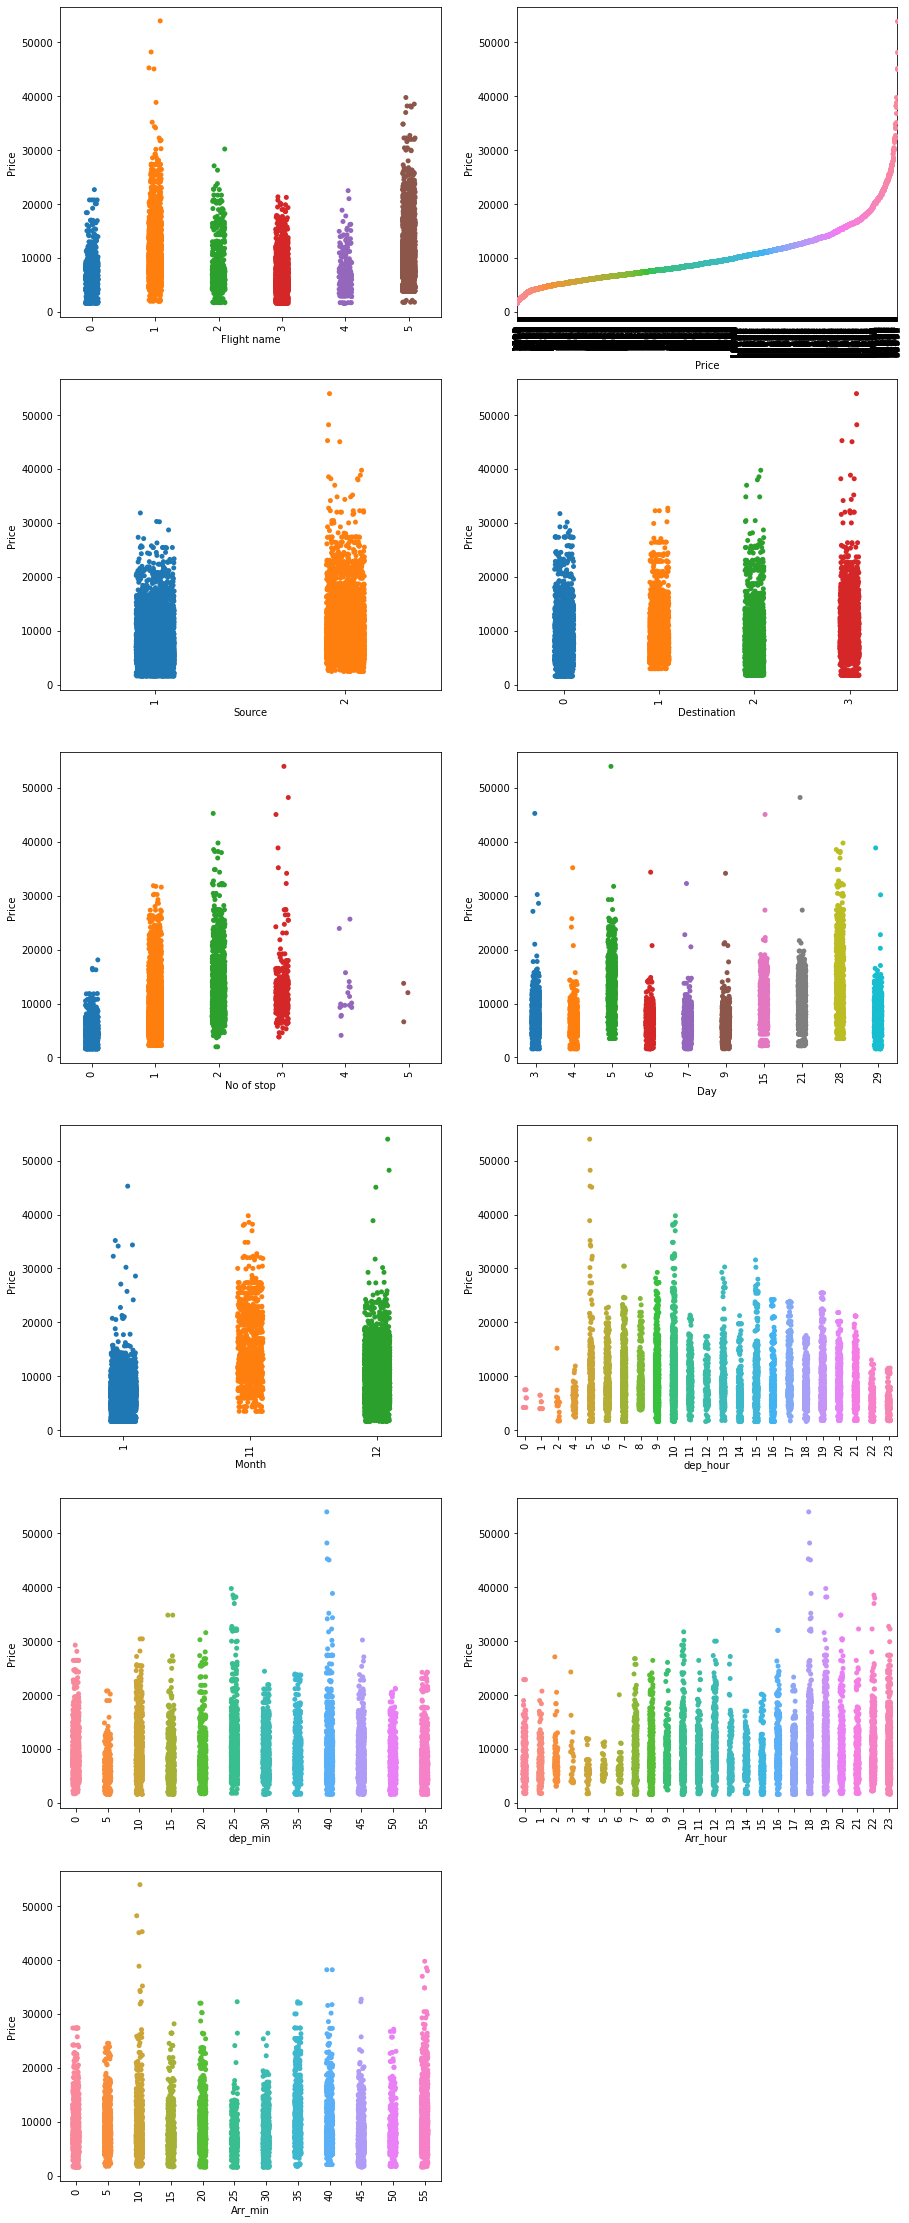

In [31]:
plotnumber=1
plt.figure(figsize=(15,40))
for i in df:
    if plotnumber < 12:
        ax = plt.subplot(6,2,plotnumber)
        sns.stripplot(df[i],df["Price"])
        plt.xticks(rotation=90)
    plotnumber+=1
plt.show()

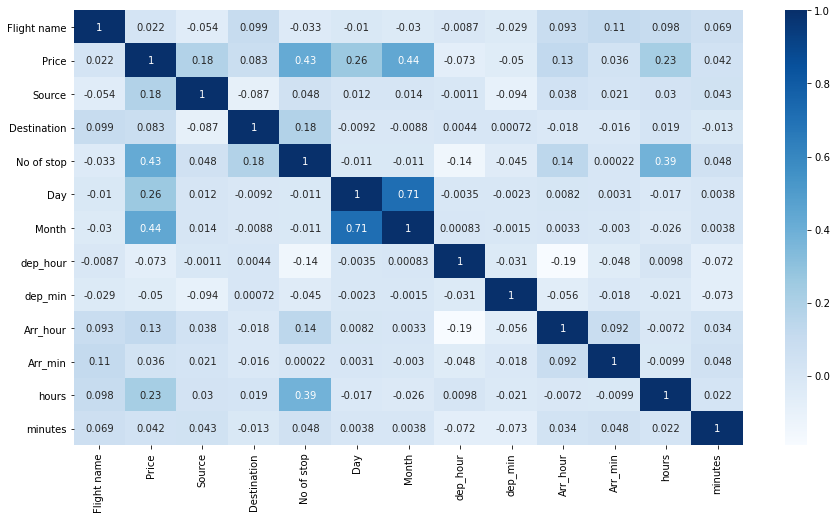

In [32]:
#multivariate analysis
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(),annot = True,cmap = "Blues")
plt.show()

month and day is showing good correlation 

<Figure size 1080x432 with 0 Axes>

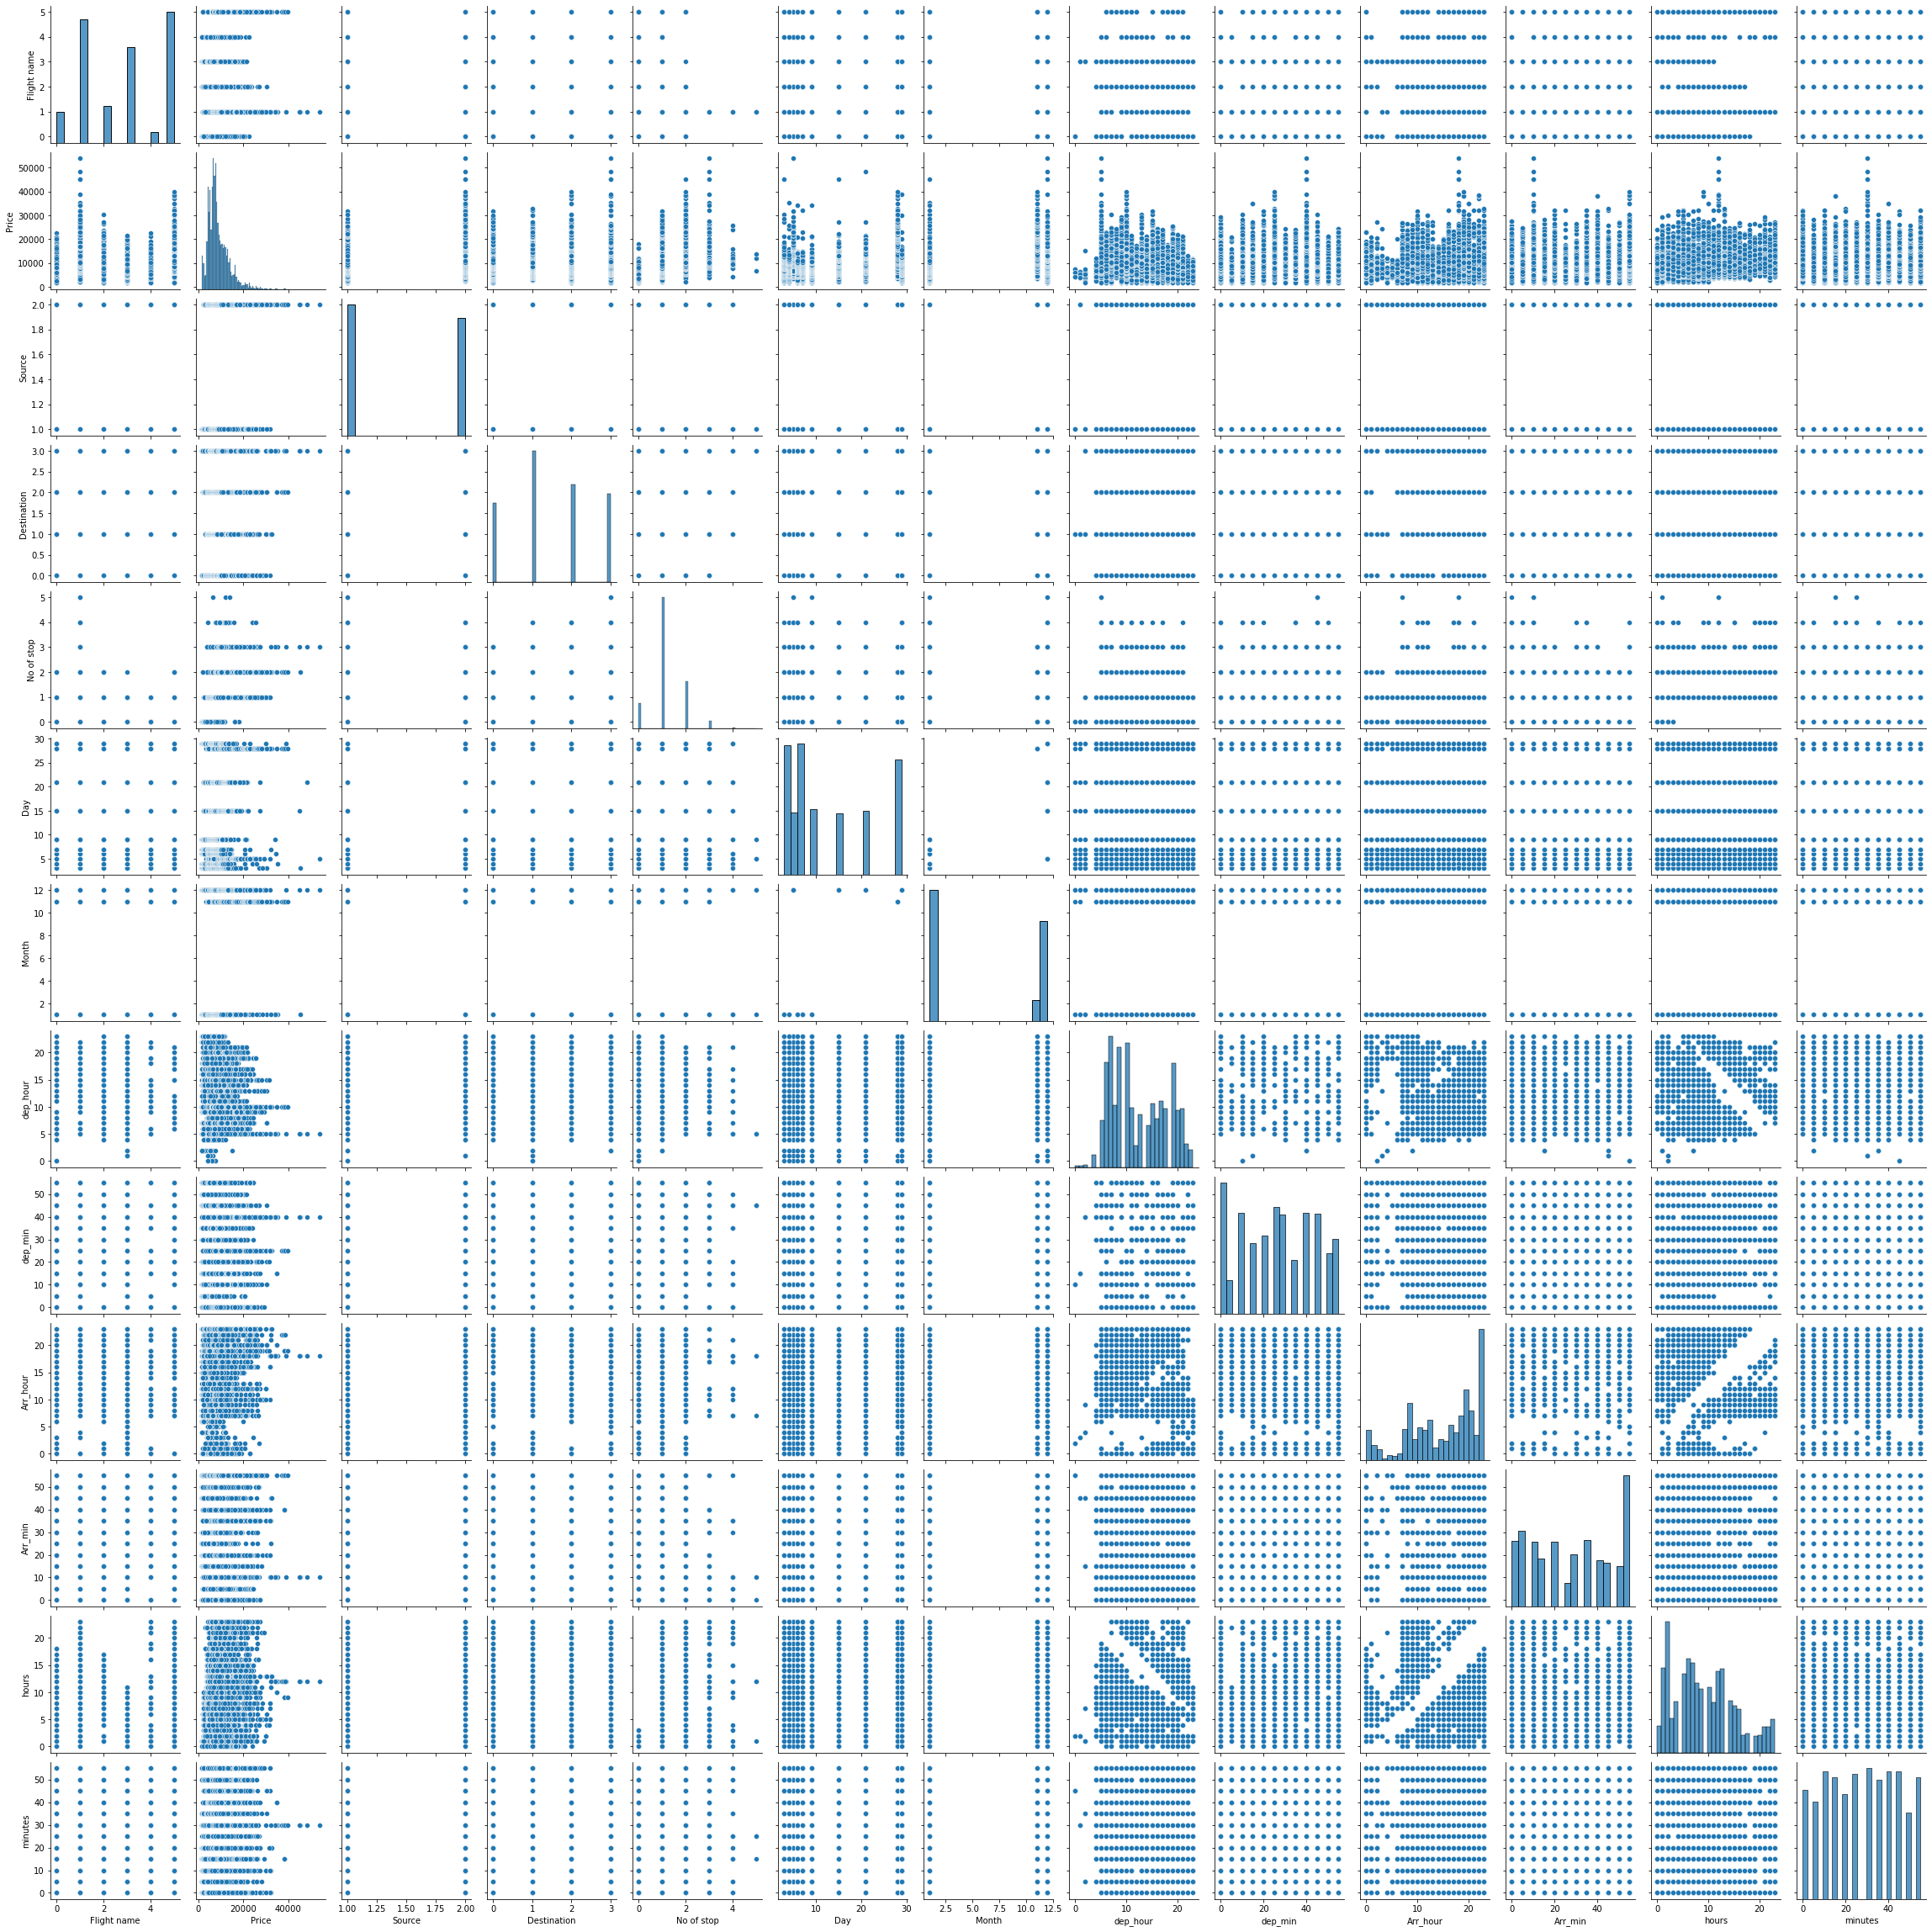

In [33]:
#pairplot
plt.figure(figsize = [15,6])
sns.pairplot(df)

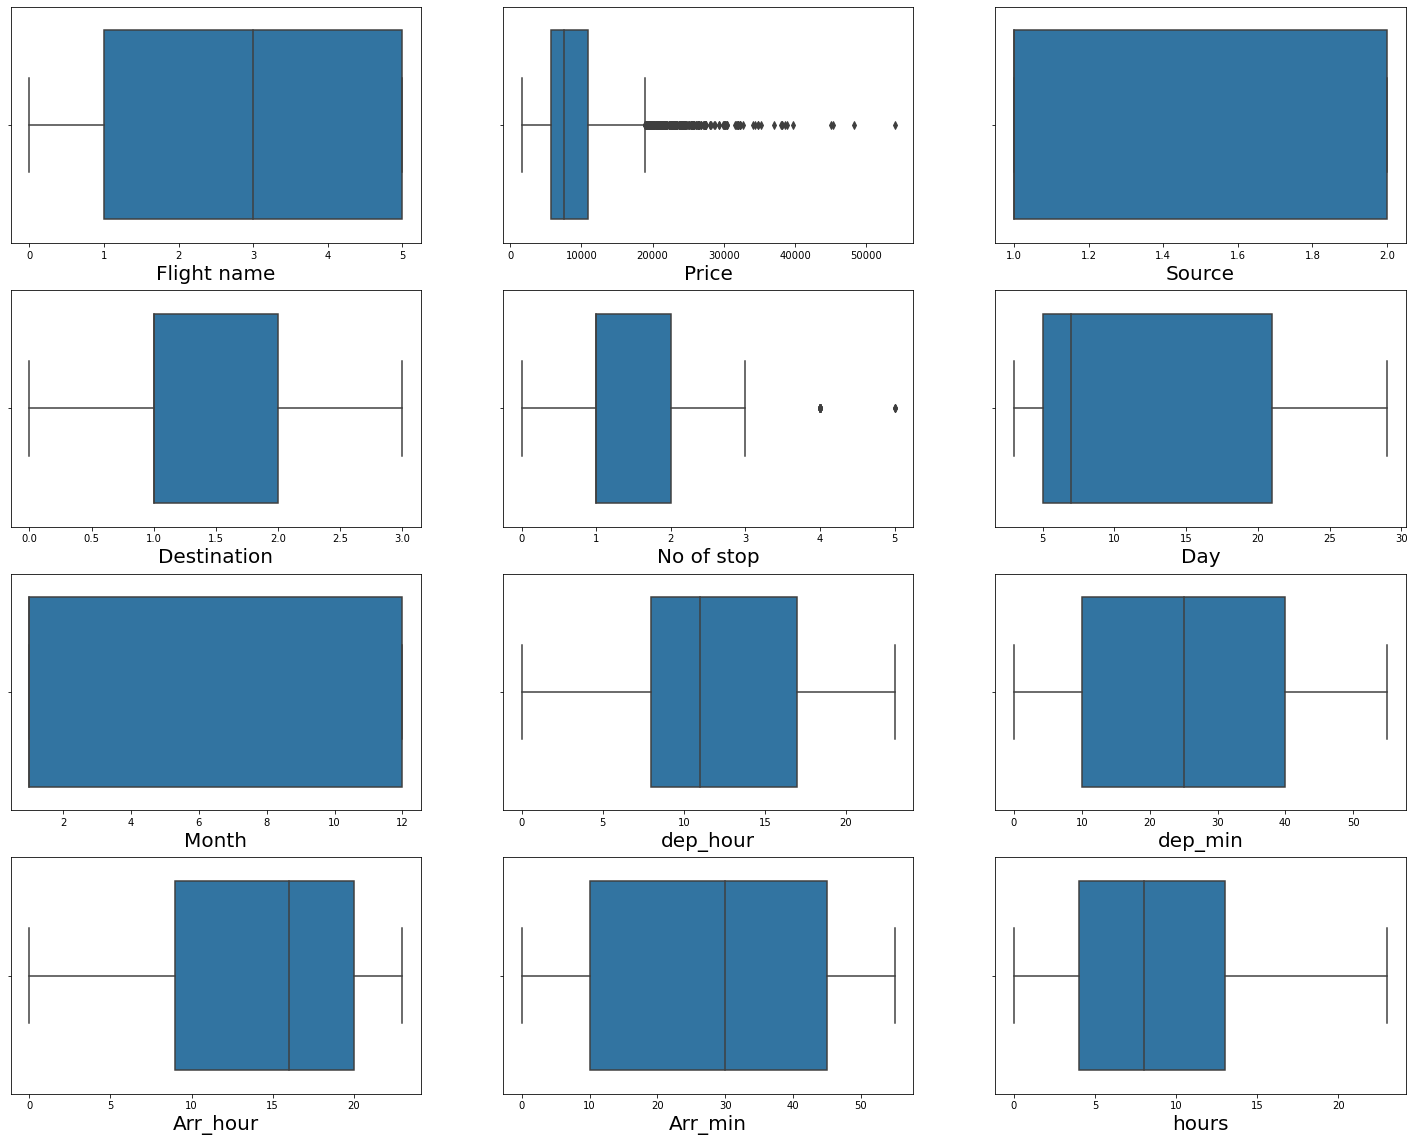

In [34]:
#using box plot to see outliers in the dataset
plt.figure(figsize=(25,20))
plotnumber = 1
for column in df:
    if plotnumber<=12:
        ax=plt.subplot(4,3,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

there is outlier in "price" but it is our target column so we dont do anything with target column keeping it same

In [35]:
#checking skewness
df.skew()

Flight name    0.071470
Price          1.736690
Source         0.107222
Destination    0.079241
No of stop     0.599168
Day            0.778017
Month          0.084141
dep_hour       0.248627
dep_min       -0.024511
Arr_hour      -0.554054
Arr_min        0.016294
hours          0.485957
minutes       -0.014624
dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

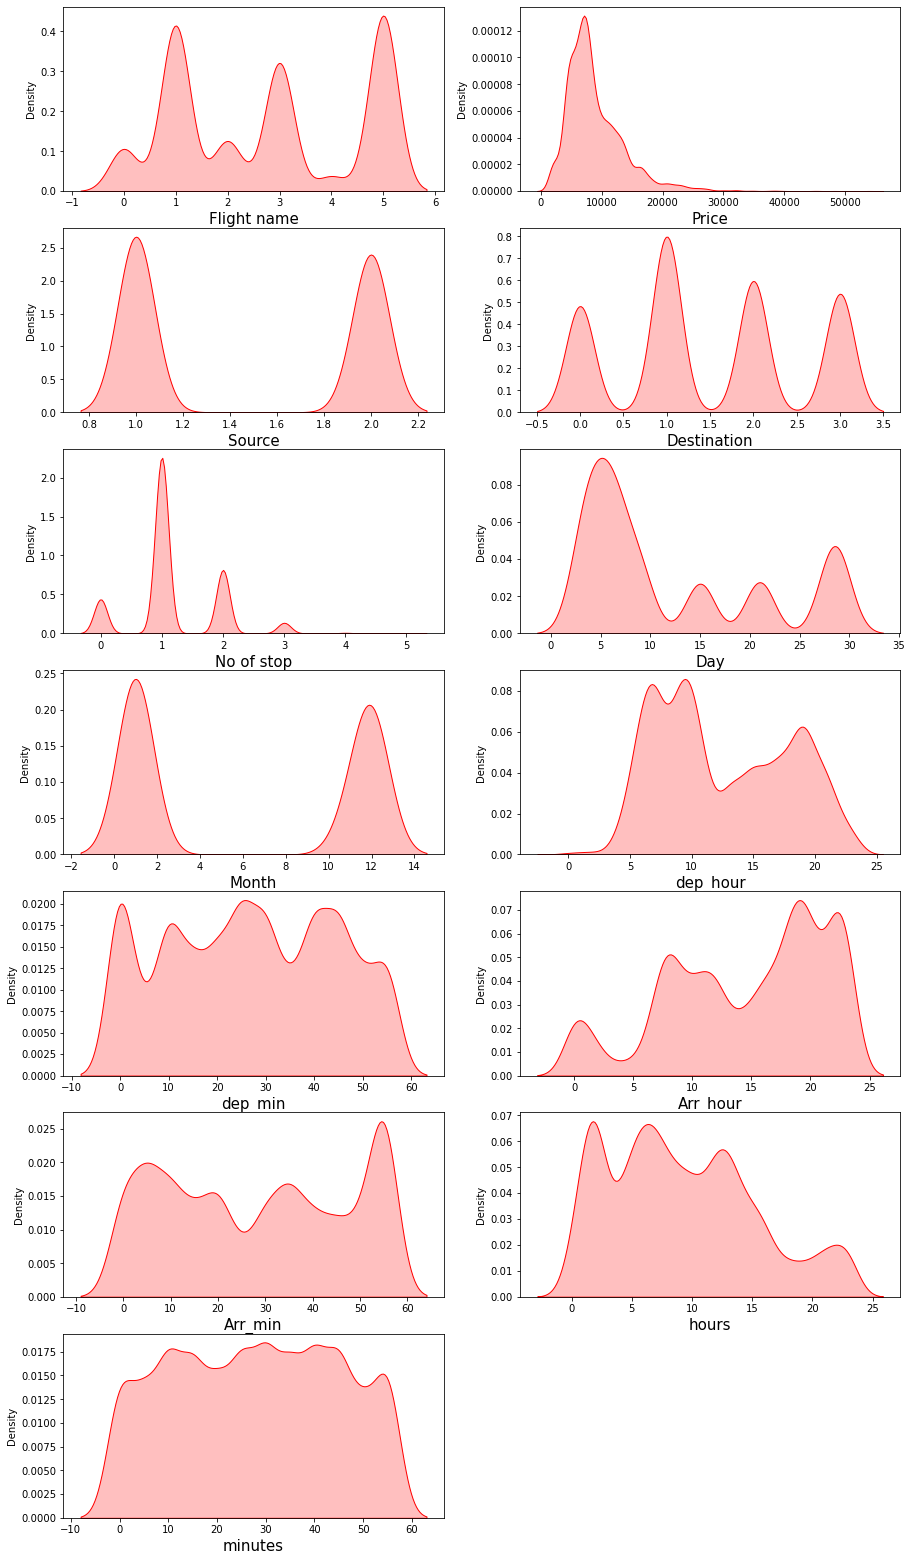

In [36]:
#for checking skewness
plotnumber=1
plt.figure(figsize=(15,40))
for i in df:
    if plotnumber < 20:
        ax=plt.subplot(10,2,plotnumber)
        sns.kdeplot(df[i],data=df,fill=True,color="r")
        plt.xlabel(i,fontsize=15)
        plotnumber+=1
plt.show

In [37]:
# for takinng care of skewness we use power transform
from sklearn.preprocessing import PowerTransformer

In [38]:
pt = PowerTransformer()
df[["Arr_hour","Day"]]= pt.fit_transform(df[["Arr_hour","Day"]])

In [39]:
df.skew()

Flight name    0.071470
Price          1.736690
Source         0.107222
Destination    0.079241
No of stop     0.599168
Day            0.093095
Month          0.084141
dep_hour       0.248627
dep_min       -0.024511
Arr_hour      -0.394378
Arr_min        0.016294
hours          0.485957
minutes       -0.014624
dtype: float64

there is skewness in target column and we dont take care of skewnesss of target column as it is not a good practice and no of stop is a categorical column and we also dont take care of skewness of categorical column

<function matplotlib.pyplot.show(close=None, block=None)>

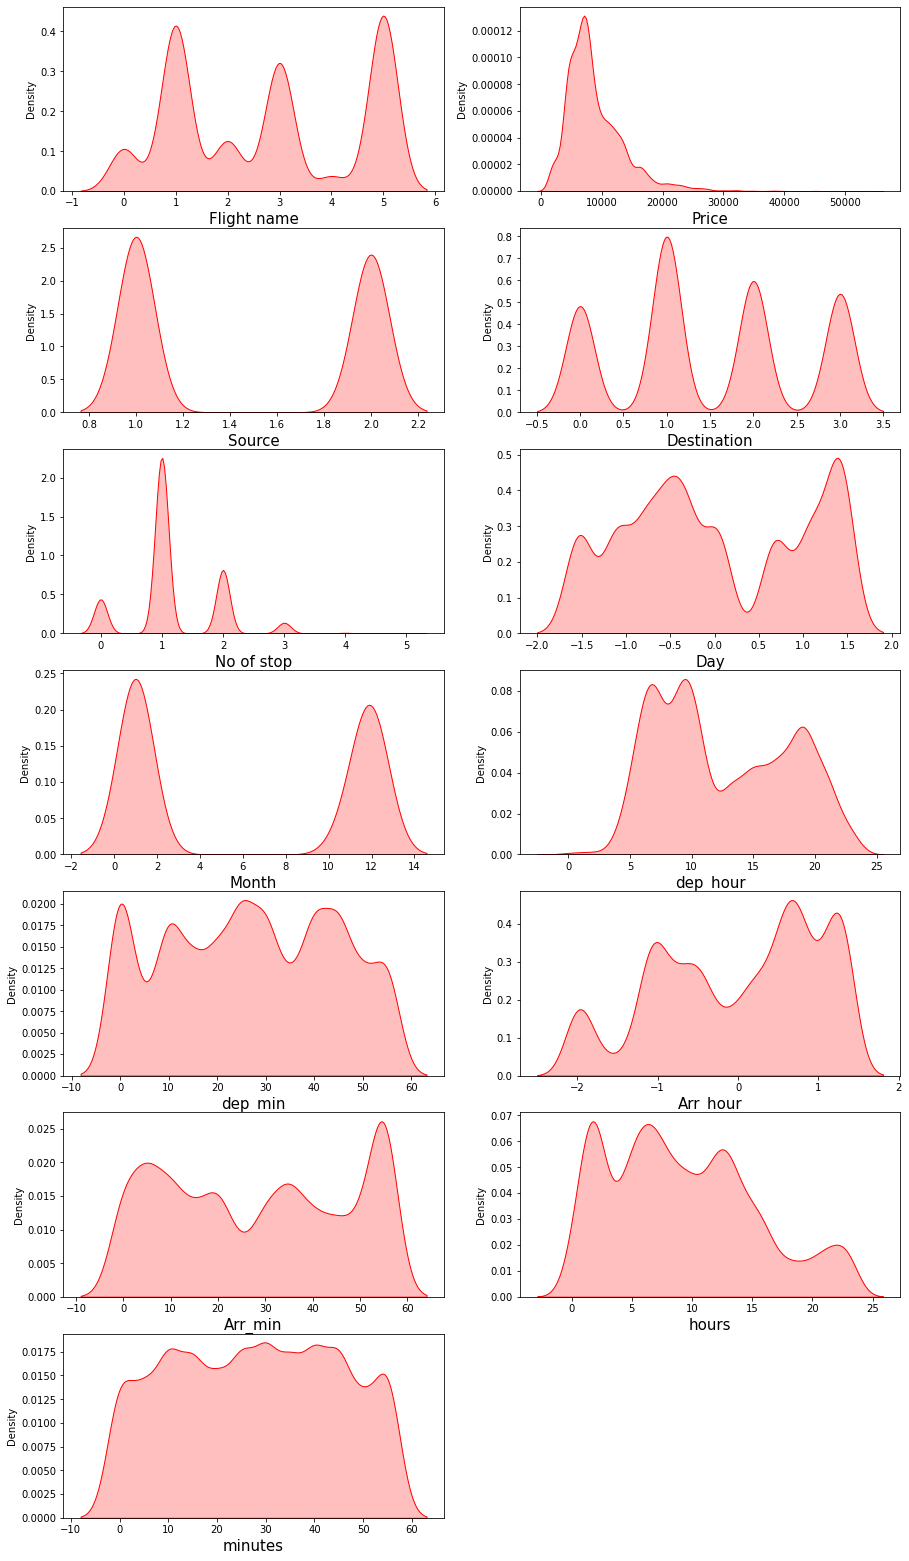

In [40]:
plotnumber=1
plt.figure(figsize=(15,40))
for i in df:
    if plotnumber < 20:
        ax=plt.subplot(10,2,plotnumber)
        sns.kdeplot(df[i],data=df,fill=True,color="r")
        plt.xlabel(i,fontsize=15)
        plotnumber+=1
plt.show

In [41]:
#splitting dataset
x=df.drop(columns=["Price",],axis=1)
y=df["Price"]


In [42]:

# model building
from sklearn.linear_model import LinearRegression,Lasso
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor,BaggingRegressor,RandomForestRegressor,AdaBoostRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [43]:
#scaling dataset
scale=StandardScaler()
x_scaled=scale.fit_transform(x)

In [44]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=50)

In [45]:
k=KFold(n_splits=5,random_state=50,shuffle=True)

# XGBRegressor

In [81]:
clf = XGBRegressor(verbosity=0)
clf.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=0)

In [82]:
y_pred = clf.predict(x_test)

In [83]:
a=r2_score(y_test,y_pred)

In [84]:
c=cross_val_score(clf,x_scaled,y,cv=k).mean()

In [85]:
print("r-2 score : ",a,"\n","cross validation score :",c)

r-2 score :  0.8861641373426836 
 cross validation score : 0.8816867337247402


In [86]:
acc= []
cv = []
diff = []
acc.append(a)
cv.append(c)
diff.append(a-c)

# DecisionTreeRegressor

In [88]:
bg = DecisionTreeRegressor()
bg.fit(x_train,y_train)

DecisionTreeRegressor()

In [89]:
y_pred = bg.predict(x_test)

In [90]:
a=r2_score(y_test,y_pred)

In [91]:
c=cross_val_score(bg,x_scaled,y,cv=k).mean()

In [92]:
print("r-2 score : ",a,"\n","cross validation score :",c)

r-2 score :  0.7612603529879596 
 cross validation score : 0.7340546547492497


In [93]:
acc.append(a)
cv.append(c)
diff.append(a-c)

# GradientBoostingRegressor

In [95]:
gd = GradientBoostingRegressor()
gd.fit(x_train,y_train)

GradientBoostingRegressor()

In [96]:
y_pred = gd.predict(x_test)

In [97]:
a=r2_score(y_test,y_pred)

In [98]:
c=cross_val_score(gd,x_scaled,y,cv=k).mean()

In [99]:
print("r-2 score : ",a,"\n","cross validation score :",c)

r-2 score :  0.74379396632131 
 cross validation score : 0.735297835995469


In [100]:
acc.append(a)
cv.append(c)
diff.append(a-c)

# BaggingRegressor

In [102]:
rf = BaggingRegressor()
rf.fit(x_train,y_train)

BaggingRegressor()

In [103]:
y_pred = rf.predict(x_test)

In [104]:
a=r2_score(y_test,y_pred)

In [105]:
c=cross_val_score(rf,x_scaled,y,cv=k).mean()

In [106]:
print("r-2 score : ",a,"\n","cross validation score :",c)

r-2 score :  0.8410325173329513 
 cross validation score : 0.8321654679476037


In [107]:
acc.append(a)
cv.append(c)
diff.append(a-c)

In [108]:
model = ["XGBRegressor","DecisionTreeRegressor","GradientBoostingRegressor","BaggingRegressor"]

In [109]:
regressor = pd.DataFrame({"MODEL":model,"Accuracy score":acc,"Cross_validation_Score":cv,"Difference":diff})

regressor

,MODEL,Accuracy score,Cross_validation_Score,Difference
0,XGBRegressor,0.886164,0.881687,0.004477
1,DecisionTreeRegressor,0.761260,0.734055,0.027206
2,GradientBoostingRegressor,0.743794,0.735298,0.008496
3,BaggingRegressor,0.841033,0.832165,0.008867


xgb is my best model

# hyper para meter tuning

In [110]:
param_search ={"n_estimators":[100,150,200],
              "random_state":[0,150,140],
              "max_depth":[6,7,8],
               
              }

In [111]:
grid_search = GridSearchCV(clf,param_grid=param_search,cv=k)

In [112]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=50, shuffle=True),
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0, gpu_id=-1,
                                    importance_type='gain',
                                    interaction_constraints='',
                                    learning_rate=0.300000012, max_delta_step=0,
                                    max_depth=6, min_child_weight=1,
                                    missing=nan, monotone_constraints='()',
                                    n_estimators=100, n_jobs=8,
                                    num_parallel_tree=1, random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, subsample=1,
                                    tree_method='exact', validate_parameters=1,
            

In [114]:
grid_search.best_params_

{'max_depth': 6, 'n_estimators': 200, 'random_state': 0}

In [115]:
clf = XGBRegressor(max_depth=6,random_state=0,n_estimators=200)

In [116]:
clf.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=200, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [117]:
y_pred = clf.predict(x_test)

In [118]:
print("r-2 score : ",r2_score(y_test,y_pred),"\n","cross validation score :",cross_val_score(clf,x_scaled,y,cv=k).mean())

r-2 score :  0.8897388008649316 
 cross validation score : 0.8869478191597148


# saving model

In [121]:
import pickle
pickle.dump(clf,open('flight_price.pk1','wb'))

In [122]:
load_model = pickle.load(open('flight_price.pk1','rb'))